In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy import integrate
import matplotlib as mpl
from scipy import interpolate
import time

from ABM_package import *

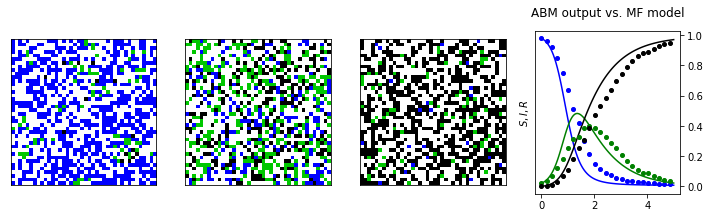

In [10]:
#parameters
ri = 0.1
rr = ri/10.0
rm = 1.0

#final time point
T_end = 5.0
t = np.linspace(0,T_end/rr,100)
plot_ind = [2,7,15]

#initial fraction of susceptible (S), infected (I), and recovered (R) agents
# (should sum to less than 1)

s0 = 0.49
i0 = 0.01
r0 = 0
N = s0 + i0 + r0

#simulate ABM
S,I,R,t,A_list,_ = SIR_ABM(ri,rr,rm,T_end)

#simulate mean-field model
SIR_y = ODE_sim(np.array([ri*N,rr]),SIR_ODE,t,np.array([s0/N,i0/N,r0/N]))

#plot!
fig = plt.figure(figsize=(12,3))

for i in np.arange(3):

    ax = fig.add_subplot(1,4,1+i,adjustable='box')
    ax.matshow(A_list[plot_ind[i]],cmap=cmap,vmax=3)
    ax.set_xticks([])
    ax.set_yticks([])




ax = fig.add_subplot(1,4,4)

#Mean-field model
ax.plot(rr*t,SIR_y[0,:],'b-',label="S")
ax.plot(rr*t,SIR_y[1,:],'g-',label="I")
ax.plot(rr*t,SIR_y[2,:],'k-',label="R")

atit = ax.set_title("ABM output vs. MF model")
atit.set_position((0.5,1.05))
ax.set_ylabel("$S,I,R$")
ax.yaxis.tick_right()

#ABM output
ax.plot(rr*t[::4],S[::4],'b.',markersize=8)
ax.plot(rr*t[::4],I[::4],'g.',markersize=8)
ax.plot(rr*t[::4],R[::4],'k.',markersize=8)

cmaplist = [(1.0,1.0,1.0,1.0),(0.0,0.0,1.0,1.0),(0.0,200.0/256.0,0.0,1.0),(0.0,0.0,0.0,1.0)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, N = 4)
